In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Data_Analyst.xlsx')
df

,Date,Revenue ($)
0,2018-03-01,7878261
1,2018-03-02,7995176
2,2018-03-03,9887822
3,2018-03-04,10067265
4,2018-03-05,9018922
...,...,...
240,2018-10-27,7789467
241,2018-10-28,6911239
242,2018-10-29,6971250
243,2018-10-30,6870345


In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         245 non-null    datetime64[ns]
 1   Revenue ($)  245 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.0 KB


### Определяем лучший месяц продаж

In [4]:
df['Month'] = df.Date.dt.month
df

,Date,Revenue ($),Month
0,2018-03-01,7878261,3
1,2018-03-02,7995176,3
2,2018-03-03,9887822,3
3,2018-03-04,10067265,3
4,2018-03-05,9018922,3
...,...,...,...
240,2018-10-27,7789467,10
241,2018-10-28,6911239,10
242,2018-10-29,6971250,10
243,2018-10-30,6870345,10


In [5]:
res = df.groupby('Month')[['Revenue ($)']].sum()
res

,Revenue ($)
Month,
3,252387296
4,226048620
5,215189204
6,214310419
7,210591514
8,205150348
9,220116347
10,210071590


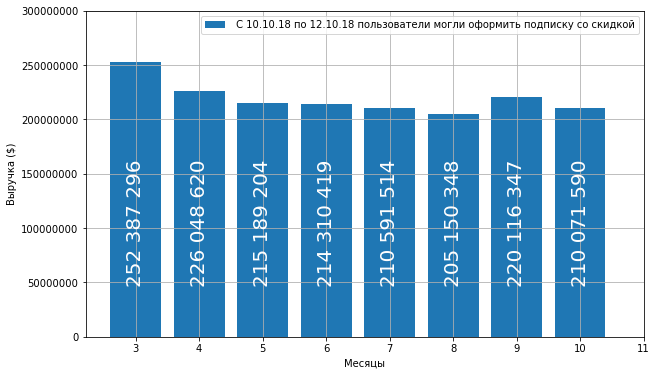

In [7]:
plt.figure(figsize=(10,6))
plt.bar(res.index, res['Revenue ($)'])
plt.xticks(range(3,12))
plt.yticks(range(0, res.max()[0]+50000000, 50000000))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)  

plt.xlabel('Месяцы')
plt.ylabel('Выручка ($)')


for index, value in enumerate(res['Revenue ($)']):
    plt.text(
        index+3,
        50000000,
        '{0:,}'.format(round(value)).replace(',', ' '),
        rotation='vertical',
        size='20',
        color='white',
        ha='center')
    

plt.grid()
plt.legend([' С 10.10.18 по 12.10.18 пользователи могли оформить подписку со скидкой'])
plt.show()

### Определяем лучший день продаж

In [8]:
df['Day_name']= df.Date.dt.day_name()
df

,Date,Revenue ($),Month,Day_name
0,2018-03-01,7878261,3,Thursday
1,2018-03-02,7995176,3,Friday
2,2018-03-03,9887822,3,Saturday
3,2018-03-04,10067265,3,Sunday
4,2018-03-05,9018922,3,Monday
...,...,...,...,...
240,2018-10-27,7789467,10,Saturday
241,2018-10-28,6911239,10,Sunday
242,2018-10-29,6971250,10,Monday
243,2018-10-30,6870345,10,Tuesday


In [9]:
res2 = df.groupby('Day_name').agg(['sum', 'count'])['Revenue ($)']
res2

,sum,count
Day_name,,
Friday,229747273,35
Monday,272239968,35
Saturday,270687262,35
Sunday,292467948,35
Thursday,228456816,35
Tuesday,229238202,35
Wednesday,231027869,35


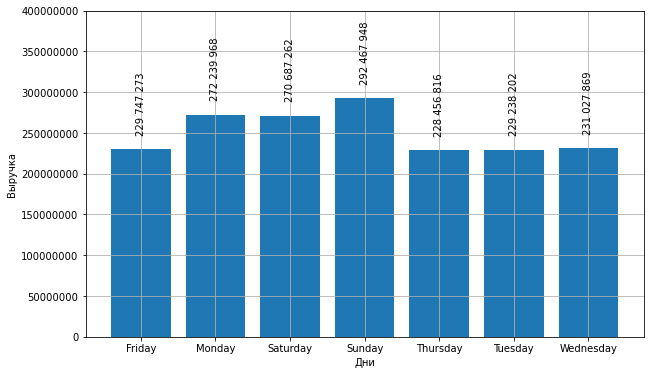

In [10]:
plt.figure(figsize=(10,6))
plt.bar(res2.index, res2['sum'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) 

plt.xticks(range(0, 7))
plt.yticks(range(0, int(res2['sum'].max())+120000000, 50000000))
 
plt.xlabel('Дни')
plt.ylabel('Выручка')


for index, value in enumerate(res2['sum']):
    plt.text(
        index,
        value+20000000,
        '{0:,}'.format(round(value)).replace(',', ' '),
        rotation=90,
        size='10',
        color='#000',
        ha='center')

plt.grid()
# plt.savefig('day_sum.png', dpi=100)
plt.show()

### Общая выручка и общее количество продаж

In [11]:
df.agg(['sum', 'count'])['Revenue ($)']

count           245
sum      1753865338
Name: Revenue ($), dtype: int64